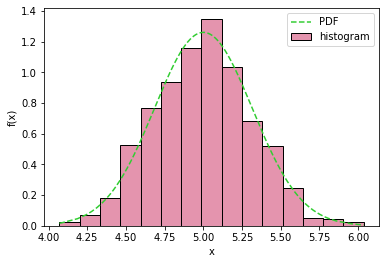

In [2]:
# --------
# Потанин Богдан Станиславович
# Математическая Статистика в Python
# Урок 5. Выборочные характеристики
# --------
# --------
# Часть №1. Выборочные характеристики
# --------
import sys
import math
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, chi2, f, norm, poisson, binom, uniform
import numpy as np
np.random.seed(123)                                     
x = t.rvs(size = 10000,                        
      df = 10)                            

# Рассчитаем основные выборочные характеристики
np.mean(x)                                              # выборочное среднее
np.var(x)                                               # выборочная дисперсия
np.var(x, ddof = 1)                                     # скорректированная выборочная дисперсия
np.median(x)                                            # выборочная медиана
np.quantile(x, 0.3)                                     # выборочная квантиль уровня 0.3
np.mean(x ** 3)                                         # выборочный начальный момент 3-го порядка
np.sort(x)                                              # реализация вариационного ряда
# Сформируем выборку из Хи-квадрат
# распределения с df степенями свободы
np.random.seed(123)                                     # для воспроизводимости результатов, полученных с использованием
                                                        # выборок, необходима установка случайного зерна
n = 100                                                 # переменная, хранящая объем выборки
df = 5                                                  # переменная, хранящая число степеней свободы
x = chi2.rvs(size = n,                                  # объем выборки
             df = df)                                   # число степеней свободы

# Рассчитаем основные выборочные характеристики
np.mean(x)                                              # выборочное среднее
np.var(x)                                               # выборочная дисперсия
np.var(x, ddof = 1)                                     # скорректированная выборочная дисперсия
np.median(x)                                            # выборочная медиана
np.quantile(x, 0.3)                                     # выборочная квантиль уровня 0.3
np.mean(x ** 3)                                         # выборочный начальный момент 3-го порядка
np.sort(x)                                              # реализация вариационного ряда

# Визуализируем, приблизительно, распределение
# выборочного среднего при помощи гистограммы
    # Сперва получим выборку из
    # выборочных средних, используя для
    # этого несколько независимых выборок
    # равного объема из одного и того
    # же распределения
m = 1000                                                # количество независимых выборок равного объема
                                                        # из одного и того же распределения
x_mean = np.empty(m)                                    # вектор, который будет содержать выборку
                                                        # из реализаций выборочного среднего
for i in range(0, m):
    x_new = chi2.rvs(size = n, df = df)
    x_mean[i] = np.mean(x_new)
x_mean = np.sort(x_mean)                                # для удобства отсортируем реализации выборочных средних
    # Воспользуемся гистограммой
f_x = norm.pdf(x_mean, loc = df,                        # при помощи ЦПТ находим истинное распределение выборочного
               scale = math.sqrt(2 * df / n))           # среднего и считаем по нему значения функции плотности
plt.xlabel('x')                                         # название нижней оси графика
plt.ylabel('f(x)')                                      # название верхней оси графика
plt.plot(x_mean, f_x, '--', markersize = 20,            # график теоретической функции распределения (по ЦПТ)
  label = "PDF", color = "limegreen")
sns.histplot(x_mean, stat = 'density',              # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 15)                             # число столбиков в Гистограмме
plt.legend()

# --------
# Часть №2. Характеристики зависимых выборок
# --------

# Симулируем выборку из двумерного
# нормального распределения
    # Зададим параметры распределения X и Y
mu_X = 100                                              # E(X)
mu_Y = 110                                              # E(Y)
var_X = 25                                              # Var(X)
var_Y = 36                                              # Var(Y)
corr_XY = -0.5                                          # Corr(X, Y)
cov_XY = math.sqrt(var_X * var_Y) *  corr_XY            # Cov(X, Y)
    # Зададим параметры распределения
    # случайного вектора (X, Y)
mu = np.array([mu_X, mu_Y])                             # E((X, Y))
sigma = np.array([[var_X, cov_XY],                      # Cov((X, Y))
                  [cov_XY, var_Y]])
    # Симулируем выборку
n = 1000
#s = multivariate_normal.rvs(size = n,                   # объем выборки
#                             mean = mu,                 # E((X, Y))
#                             cov = sigma)               # Cov((X, Y))
#x = s[:, 0]                                             # реализации первой выборки
#y = s[:, 1]                                             # реализации второй выборки

# Рассмотрим выборочные характеристики, описывающие
# зависимость между X и Y
#np.cov(x, y)                                            # выборочная ковариационная матрица
#np.corrcoef(x, y)                                       # выборочная корреляционная матрица

In [3]:
import numpy as np

In [4]:
import sys
import math
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, chi2, f, norm, poisson, binom, uniform, multivariate_normal
np.set_printoptions(suppress = True)   

In [5]:
# 1. Визуализируйте для выборки объема 5000 из распределения
#    Стьюдента с 10-ю степенями свободы, при помощи Гистограммы,
#    распределение:

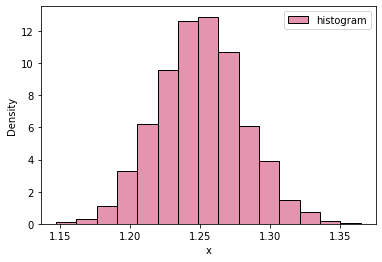

In [6]:
#    1)     Второго начального выборочного момента
m = 5000                                                                                            
x_mean = np.empty(m)                               
n = 5000                                           
for i in range(0, m):
    x_new = t.rvs(size = 5000, df = 10)
    x_mean[i] = np.mean(x_new**2)
x_mean = np.sort(x_mean)                       
plt.xlabel('x')                                                                      
sns.histplot(x_mean, stat = 'density', color = "palevioletred",label = "histogram", bins = 15)                          
plt.legend()

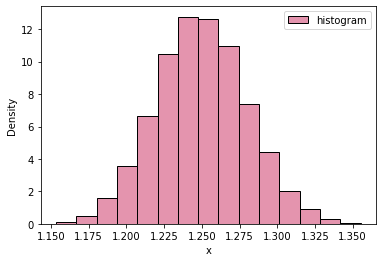

In [7]:
m = 5000                                        
#    2)     Выборочной дисперсии                                                     
x_mean = np.empty(m)                                 
n = 5000                                             
for i in range(0, m):
    x_new = t.rvs(size = 5000, df = 10)
    x_mean[i] = np.mean(np.var(x_new))
x_mean = np.sort(x_mean)                             
plt.xlabel('x')                                                                        
sns.histplot(x_mean, stat = 'density',color = "palevioletred",label = "histogram",bins = 15)                          
plt.legend()

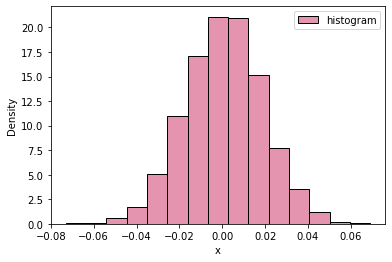

In [8]:
m = 5000                                           
#    3)     Выборочной медианы                  
x_mean = np.empty(m)                               
n = 5000                                           
for i in range(0, m):
    x_new = t.rvs(size = 5000, df = 10)
    x_mean[i] = np.mean(np.median(x_new))
x_mean = np.sort(x_mean)                            
plt.xlabel('x')                                    
sns.histplot(x_mean, stat = 'density',color = "palevioletred",label = "histogram",bins = 15)                        
plt.legend()

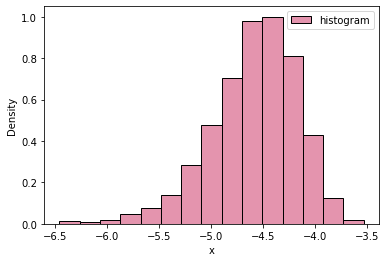

In [9]:
m = 5000                                                # количество независимых выборок равного объема
#    4)     Третьей порядковой статистики, то есть
#           третьего элемента вариационного ряда                                                        # из одного и того же распределения
x_mean = np.empty(m)                                
n = 5000                                            
for i in range(0, m):
    x_new = t.rvs(size = 5000, df = 10)
    x_mean[i] = np.sort(x_new)[2]
x_mean = np.sort(x_mean)                            
f_x = norm.pdf(x_mean, loc = 10,                   
               scale = math.sqrt(2 * 10 / 5000))    
plt.xlabel('x')                                                                    
sns.histplot(x_mean, stat = 'density',color = "palevioletred",label = "histogram",bins = 15)                         
plt.legend()

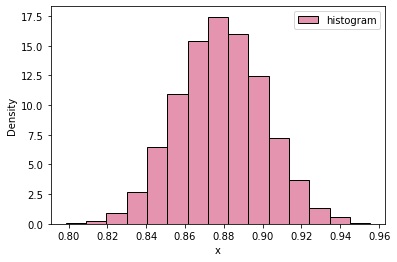

In [10]:
m = 5000                                          
#    5)     Выборочной квантили уровня 0.8       
x_mean = np.empty(m)                              
n = 5000                                          
for i in range(0, m):
    x_new = t.rvs(size = 5000, df = 10)
    x_mean[i] = np.mean(np.quantile(x_new, 0.8))
x_mean = np.sort(x_mean)                          
plt.xlabel('x')                                                                  
sns.histplot(x_mean, stat = 'density',color = "palevioletred",label = "histogram",bins = 15)                       
plt.legend() 

In [11]:
# 2. Повторите предыдущий пункт, но визуализируя не
#    выборочные, а истинные распределения. В некоторых
#    пунктах удобно использовать ЦПТ, в других - распределение
#    необходимо выводить иными способами.


In [12]:
# 3. Симулируйте три независимых выборки объемом в 5000 наблюдений
#    из стандартного равномерного распределения. Получите из этих
#    двух выборок две сложив первую со второй, а вторую - с третьей.
#    Для получившихся выборок:

In [13]:
x1 = norm.rvs(size = 5000, loc = 0, scale = 1)   

In [14]:
x2 = norm.rvs(size = 5000, loc = 0,scale = 1)  
x3 = norm.rvs(size = 5000, loc = 0,scale = 1)  

In [15]:
x_n1 = x1+x2
x_n1

array([ 0.75335431,  1.47946955, -2.27669863, ...,  0.47937434,
       -0.39319786, -2.02148347])

In [16]:
x_n2 = x2+x3
x_n2

array([-0.18145333, -0.21272643, -0.55859322, ..., -0.42338636,
       -1.29861346,  0.00307768])

In [17]:
#Посчитайте выборочную ковариационную матрицу
np.cov(x_n1, x_n2)                                           

array([[2.04123956, 1.0178211 ],
       [1.0178211 , 1.95167277]])

In [18]:
#Рассчитайте выборочную корреляционную матрицу
np.corrcoef(x_n1, x_n2) 

array([[1.        , 0.50994221],
       [0.50994221, 1.        ]])

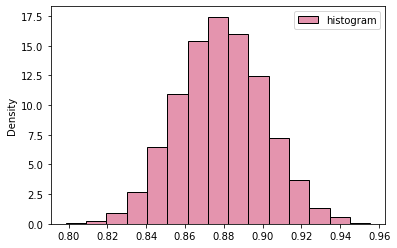

In [19]:
#При помощи гистограммы визуализируйте распределение
#           выборочной корреляции
m = 1000                                                                                   
x = np.empty(m)                                
                                                       
for i in range(0, m):
    x1 = norm.rvs(size = 5000, loc = 0, scale = 1) 
    x2 = norm.rvs(size = 5000, loc = 0, scale = 1)  
    x3 = norm.rvs(size = 5000, loc = 0, scale = 1)  
    x_n1 = x1+x2
    x_n2 = x2+x3
    x[i] = np.corrcoef(x_n1, x_n2)[1][0]
x = np.sort(x_mean)                                     
sns.histplot(x, stat = 'density', color = "palevioletred",label = "histogram",bins = 15)                           
plt.legend()

In [20]:
# 4. Самостоятельно запрограммируйте функции, позволяющие рассчитывать

In [21]:
#    1)     Выборочное среднее
def srednee(x):
    return sum(x)/len(x)

In [22]:
#    2)     Выборочную дисперсию
def disp(x):
    return srednee(x**2) - (srednee(x))**2

In [23]:
#    3*)    Выборочную медиану
def median(x):
    return np.quantile(x, 0.5)

In [24]:
#    4)     Порядковые статистики
# не знаю

In [25]:
#    5*)    Выборочную ковариационную матрицу
def cov(x,y):
    return np.mean((x-np.mean(x))(y-np.mean(y)).T)

In [26]:
# 5. Симулируйте три независимые выборки: две из стандартного нормального
#    распределения и одну из Хи-Квадрат распределения с двумя степенями
#    свободы. Сформируйте еще одну выборку сложив квадраты выборок из
#    стандартных нормальных распределений. Сравните выборочные характеристики
#    получившейся выборки с выборочными характеристиками выборки из Хи-Квадрат
#    распределения с двумя степенями свободы. Сделайте выводы о причинах
#    налблюдаемого сходства в выборочных характеристиках.

In [27]:
xs = norm.rvs(size = 100000,loc = 0, scale = 1)      

In [28]:
xs2 = norm.rvs(size = 100000,loc = 0, scale = 1)      

In [29]:
ch = chi2.rvs(size = 100000,df = 2)    

In [30]:
chfake = xs**2+xs2**2

In [31]:
print(np.mean(chfake),np.var(chfake),np.var(chfake, ddof = 1),np.median(chfake),np.quantile(chfake, 0.3),np.mean(chfake ** 3),np.sort(chfake))    
print(np.mean(ch),np.var(ch),np.var(ch, ddof = 1),np.median(ch),np.quantile(ch, 0.3),np.mean(ch ** 3),np.sort(ch)) 

2.012419489783326 4.04204146637424 4.0420818871931115 1.3937004180917776 0.7182579080468052 48.52621294044254 [ 0.00000361  0.00000557  0.00006004 ... 19.38357228 19.60145837
 20.88787315]
1.9932063144014378 3.982048233288702 3.9820880541692434 1.3822629085601528 0.7141903465004127 47.83117137642064 [ 0.00005158  0.00005887  0.00009332 ... 21.62823962 21.64969214
 23.75670729]
